# sommelier.ai
#### Practical Machine Learning Workshop

### Agenda:
- Data Exploration with pandas
- Modeling with scikit-learn

### Tools and Documentation
- [pandas](https://pandas.pydata.org/pandas-docs/stable/api.html)
- [scikit-learn](http://scikit-learn.org/stable/index.html)
- [matplotlib](https://matplotlib.org/api/api_overview.html)
- [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/getting_started/overview.html)


## Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from workshop import boxplot_sorted

sns.set(style="darkgrid")

In [51]:
df = pd.read_csv('.\\data\\winemag-data.zip')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer
1,US,If you're curious about California Grenache Bl...,Tourmaline,88,24.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Coghlan 2010 Tourmaline Grenache Blanc (Santa ...,Grenache Blanc,Coghlan
2,France,"While the acidity is intense, it is balanced b...",NaN,84,15.0,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de Roche Guillon 2013 Beaujolais-Vill...,Gamay,Domaine de Roche Guillon
3,France,Red fruits and a soft tannic profile give a re...,NaN,88,17.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Domaine de Cause 2011 Malbec (Cahors),Malbec,Domaine de Cause
4,Spain,Shows true Priorat depth and minerality while ...,Balcons,90,60.0,Catalonia,Priorat,NaN,Michael Schachner,@wineschach,Pinord 2004 Balcons Red (Priorat),Red Blend,Pinord


In [28]:
df.loc[(df.country =="US") & (df.points == 80)].sort_values("price", ascending=False).head(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
29778,US,Smells and tastes like caramel and stewed cher...,Scoprire,80,55.0,California,California,California Other,NaN,NaN,Millésimé 2005 Scoprire Red (California),Red Blend,Millésimé
66060,US,There's little going on in this wine beyond su...,DeLuz,80,45.0,California,California,California Other,NaN,NaN,Casa Tiene Vista NV DeLuz Red (California),Red Blend,Casa Tiene Vista
30494,US,"Blended from Syrah, Mourvèdre and the two Cabe...",Scopire,80,45.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Millésimé 2008 Scopire Red (Santa Ynez Valley),Red Blend,Millésimé
29389,US,"Way too high in alcohol, giving it the ripe, h...",Reserve,80,44.0,California,Paso Robles,Central Coast,NaN,NaN,Opolo 2011 Reserve Zinfandel (Paso Robles),Zinfandel,Opolo
99811,US,Charming aromas of tobacco leaf and strawberri...,Reserve,80,42.0,New York,Finger Lakes,Finger Lakes,NaN,NaN,Catharine Valley 2005 Reserve Cabernet Franc (...,Cabernet Franc,Catharine Valley


In [32]:
df.taster_name.value_counts().count()

19

### Description length by word

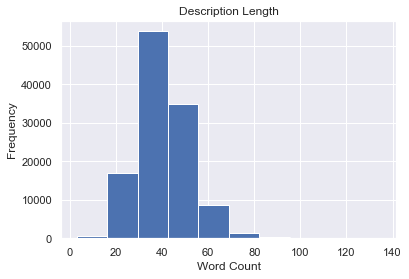

In [46]:
df.description.str.split(' ').apply(len).plot.hist(title="Description Length").set(xlabel="Word Count");

In [47]:
### Picky Tasters

In [ ]:
df.boxplot(by="taster_name", column="points", vert=False, figsize=(10,12));
boxplot_sorted(df, by="taster_name", column="points", vert=False, figsize=(10,12), patch_artist=True)

In [19]:
### rating by winery

In [22]:
top20wineries = df.winery.value_counts().head(20)
top20wineries

Wines & Winemakers            201
DFJ Vinhos                    197
Testarossa                    193
Williams Selyem               190
Chateau Ste. Michelle         180
Georges Duboeuf               178
Louis Latour                  177
Concha y Toro                 152
Columbia Crest                144
Gary Farrell                  115
Kendall-Jackson               114
Siduri                        109
Albert Bichot                 108
Montes                        107
Undurraga                     106
Trapiche                      104
Lynmar                        104
Jean-Luc and Paul Aegerter    104
V. Sattui                     100
Santa Ema                      99
Name: winery, dtype: int64

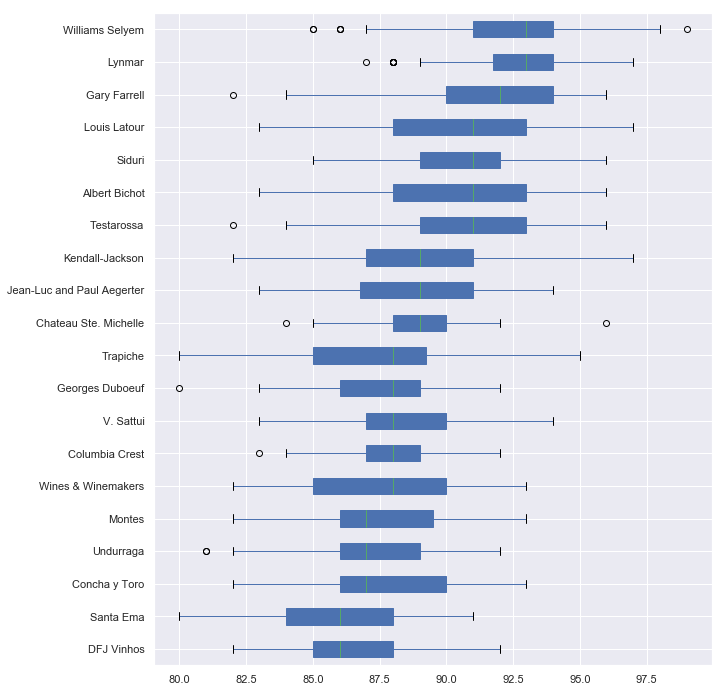

In [26]:
winesFromTop20Wineries = df[df.winery.isin(top20wineries.index)]
boxplot_sorted(winesFromTop20Wineries, by="winery", column="points", vert=False, figsize=(10,12), patch_artist=True)

In [27]:
df["value"] = df.points / df.price

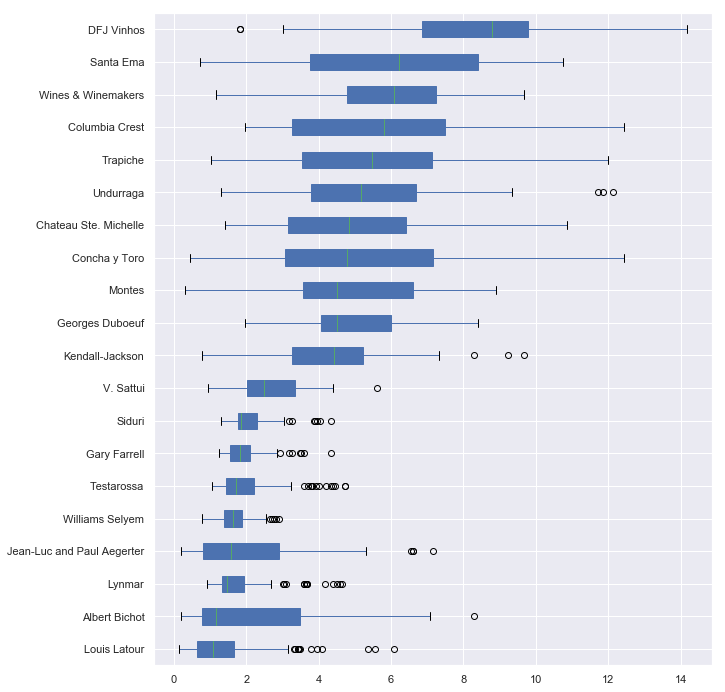

In [30]:
winesFromTop20Wineries = df[df.winery.isin(top20wineries.index)]
boxplot_sorted(winesFromTop20Wineries, by="winery", column="value", vert=False, figsize=(10,12), patch_artist=True)

In [31]:
df.loc[df.winery == "DFJ Vinhos"].describe()

,points,price,variety_freq,value
count,197.000000,192.000000,0.0,192.000000
mean,86.649746,11.369792,NaN,8.539773
std,2.491652,5.545974,NaN,2.307529
min,82.000000,6.000000,NaN,1.820000
25%,85.000000,9.000000,NaN,6.846154
50%,86.000000,10.000000,NaN,8.800000
75%,88.000000,13.000000,NaN,9.777778
max,92.000000,50.000000,NaN,14.166667


In [32]:
df.loc[df.winery == "Louis Latour"].describe()

,points,price,variety_freq,value
count,177.000000,152.000000,0.0,152.000000
mean,90.559322,139.052632,NaN,1.318783
std,2.840082,138.283507,NaN,1.081895
min,83.000000,14.000000,NaN,0.146154
25%,88.000000,54.750000,NaN,0.640764
50%,91.000000,85.000000,NaN,1.076471
75%,93.000000,141.250000,NaN,1.659091
max,97.000000,650.000000,NaN,6.071429


In [35]:
df.loc[df.title.str.contains("18")]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,variety_freq,value
364,US,This shows a darker shade than most young whit...,61% Sémillon/21% Sauvignon/18% Muscadelle,92,25.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Buty 2010 61% Sémillon/21% Sauvignon/18% Musca...,White Blend,Buty,NaN,3.680000
476,France,"A simple, big and fruity Malbec, softer than m...",Noir 46,88,14.0,Southwest France,Cahors,NaN,Roger Voss,@vossroger,Vignobles 46N118 2008 Noir 46 Malbec (Cahors),Malbec,Vignobles 46N118,NaN,6.285714
1475,Australia,Fruit from 900 of some of the planet's oldest ...,Attunga 1865,94,235.0,South Australia,Clare Valley,NaN,Joe Czerwinski,@JoeCz,Kilikanoon 2010 Attunga 1865 Shiraz (Clare Val...,Shiraz,Kilikanoon,NaN,0.400000
1846,Spain,This is a very nice value wine with balsam woo...,Ramón Roqueta,88,12.0,Catalonia,Catalunya,NaN,Michael Schachner,@wineschach,Bodegas 1898 2011 Ramón Roqueta Tempranillo (C...,Tempranillo,Bodegas 1898,NaN,7.333333
1980,Spain,So thick and rich that it seems to fall apart ...,Premium Sweet Sherry 1827,91,20.0,Andalucia,Jerez,NaN,Michael Schachner,@wineschach,Osborne NV Premium Sweet Sherry 1827 Pedro Xim...,Pedro Ximénez,Osborne,NaN,4.550000
2551,Moldova,This lovely wine offers aromas of cherry vanil...,1827,90,16.0,Moldova,NaN,NaN,Jeff Jenssen,@worldwineguys,Purcari 2015 1827 Rara Neagra (Moldova),Rara Neagra,Purcari,NaN,5.625000
2624,Moldova,"Aromas of lemon zest, lemongrass and lime juic...",1827,89,15.0,Moldova,NaN,NaN,Jeff Jenssen,@worldwineguys,Purcari 2015 1827 Pinot Grigio (Moldova),Pinot Grigio,Purcari,NaN,5.933333
2709,Spain,"This Tempranillo is loaded up front, with berr...",Campo Lindo Tradicional,88,12.0,Catalonia,Catalunya,NaN,Michael Schachner,@wineschach,Bodegas 1898 2011 Campo Lindo Tradicional Temp...,Tempranillo,Bodegas 1898,NaN,7.333333
2913,Italy,A few swirls of the glass release alluring smo...,NaN,91,28.0,Southern Italy,Fiano di Avellino,NaN,Kerin O’Keefe,@kerinokeefe,Tenuta Sarno 1860 2015 Fiano di Avellino,Fiano,Tenuta Sarno 1860,NaN,3.250000
3750,Chile,Younger is better when it comes to 1865 SB. Ta...,1865 Single Vineyard,88,17.0,Leyda Valley,NaN,NaN,Michael Schachner,@wineschach,San Pedro 2008 1865 Single Vineyard Sauvignon ...,Sauvignon Blanc,San Pedro,NaN,5.176471


## Modeling

In [66]:
from sklearn import metrics
from sklearn.pipeline import *
from sklearn.feature_extraction.text import *
from sklearn.linear_model import *
from sklearn.naive_bayes import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.impute import *
from sklearn.preprocessing import *

from workshop import show_most_informative_features

In [52]:
df["is_good"] = df.points > 88

In [44]:
df.is_good.value_counts()

False    61869
True     55104
Name: is_good, dtype: int64

In [56]:
#df = df.drop(["variety_freq", "is_good", "is_bad", "is_88", "points", "price", "value"], axis=1)
df.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,is_good
0,US,This wine's aromas are vibrant and fruit forwa...,NaN,91,29.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Baer 2014 Malbec (Columbia Valley (WA)),Malbec,Baer,True


In [62]:
train = df.drop(['is_good', 'points', 'price'], axis=1)

In [65]:
train.shape

(116973, 11)

In [68]:
train_df, test_df, train_labels, test_labels = train_test_split(
    train,
    df.is_good,
    random_state=3)

In [90]:
%%time
 
model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB())
 
model.fit(train_df.description, train_labels);
#results = cross_validate(model, train_df.description, train_labels, cv=3);

Wall time: 4.03 s


In [92]:
predicted = model.predict(test_df.description)
score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))

IndexingError: Too many indexers

In [91]:
%%time
 
categorical_features = ['country', 'winery']
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))
 
model = make_pipeline(
            make_column_transformer(
                ('description', TfidfVectorizer()),
                (categorical_features, categorical_transformer)
                ),
            SGDClassifier(n_jobs=-1, max_iter=1000))
 
model.fit(train_df, train_labels)
 
predicted = model.predict(test_df)
 
score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)
 
print(metrics.classification_report(test_labels, predicted))

KeyboardInterrupt: 

In [88]:
df.loc[df.price == 4].describe()

,points,price
count,10.000000,10.0
mean,84.500000,4.0
std,0.971825,0.0
min,83.000000,4.0
25%,84.000000,4.0
50%,84.000000,4.0
75%,85.000000,4.0
max,86.000000,4.0


In [89]:
df.loc[df.points == 88].describe()

,points,price
count,15516.0,14437.000000
mean,88.0,28.708527
std,0.0,32.610260
min,88.0,6.000000
25%,88.0,17.000000
50%,88.0,24.000000
75%,88.0,35.000000
max,88.0,3300.000000


In [70]:
predicted = model.predict(test_df.description)
score = metrics.accuracy_score(test_labels, predicted)
print('\nAccuracy: %0.3f' % score)

print(metrics.classification_report(test_labels, predicted))


Accuracy: 0.796
              precision    recall  f1-score   support

       False       0.81      0.80      0.81     15450
        True       0.78      0.80      0.79     13794

   micro avg       0.80      0.80      0.80     29244
   macro avg       0.80      0.80      0.80     29244
weighted avg       0.80      0.80      0.80     29244

